In [34]:
!python -m spacy download en
!pip install --no-cache-dir wordcloud



    100% |████████████████████████████████| 52.2MB 7.1MB/s ta 0:00:011    37% |████████████                    | 19.7MB 1.3MB/s eta 0:00:26    90% |████████████████████████████▉   | 47.0MB 1.2MB/s eta 0:00:05
  Running setup.py install for en-core-web-sm ... error
    Complete output from command /Users/mayashen/miniconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/4w/lqxhf57s5qn_m4njjy76lln00000gn/T/pip-s1yb0h60-build/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /var/folders/4w/lqxhf57s5qn_m4njjy76lln00000gn/T/pip-r383qd62-record/install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build/lib
    creating build/lib/en_core_web_sm
    copying en_core_web_sm/__init__.py -> build/lib/en_core_web_sm
    creating build/lib/en_core_web_sm/en_cor

In [15]:
!pip install --no-cache-dir wordcloud

In [35]:
import spacy
from datascience import *
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
with open('data/islandpoetry1_22.txt', "r") as f:
    raw = f.read()

In [37]:
raw

'The sea-scape resembles lichen twisting and\nturning for a thousand li\nThere is no shore to land and it is difficult to\nwalk.\nWith a gentle breeze I arrived at the city\nthinking all would be so.\nAt ease, how was one to know he was to live in a\nwooden building?\n\nBecause my house had bare walls, I began\nrushing all about.\nThe waves are happy, laughing "Ha-ha!"\nWhen I arrived on Island, I heard I was\nforbidden to land.\nI could do nothing but frown and feel angry\nat heaven.\n\nAs a rule, a person is twenty before he starts\nmaking a living.\nFamily circumstances have forced me to\nexperience wind and dust.\nThe heartless months and years seem bent on\ndefeating me.\nIt is a pity that time quickly ages one.\n\nThe gold and silver of America is very\nappealing.\nJabbing an awl into the thigh in search of\nglory,\nI embarked on the journey.\nNot only are my one-thousand pieces of gold\nalready depleted, but\nMy countenance is blackened. It is surely for\nthe sake of the family.

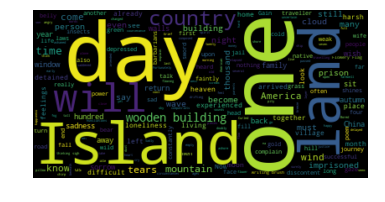

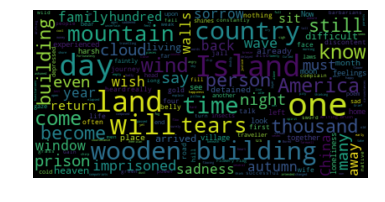

In [38]:
wordcloud = WordCloud().generate(raw)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# formal analysis

In [39]:
len(raw.split("\n\n"))

49

In [40]:
[len(p) for p in raw.split("\n\n")]

[259,
 212,
 227,
 262,
 306,
 233,
 654,
 260,
 488,
 550,
 206,
 167,
 331,
 325,
 128,
 203,
 196,
 251,
 221,
 250,
 488,
 201,
 206,
 237,
 344,
 243,
 442,
 345,
 507,
 474,
 382,
 465,
 624,
 445,
 302,
 399,
 230,
 505,
 268,
 437,
 287,
 226,
 532,
 116,
 487,
 254,
 279,
 263,
 233]

In [41]:
np.mean([len(p) for p in raw.split("\n\n")])

325.51020408163265

In [42]:
from string import punctuation

poems = raw.split("\n\n")

all_poems_enjambment = []
for p in poems:
    lines = p.split("\n")
    enjambment = 0
    for l in lines:
        try:
            if l[-1] in punctuation:
                pass
            else:
                enjambment += 1
        except:
            pass
    enj = enjambment/len(lines)
    all_poems_enjambment.append(enj)
    
print(np.mean(all_poems_enjambment))

0.412377450849


# NLP text analysis

In [104]:
nlp = spacy.load('en', parser=False)



    Only loading the 'en' tokenizer.



In [105]:
parsed_text = nlp(raw.replace("\n", " "))
parsed_text

The sea-scape resembles lichen twisting and turning for a thousand li There is no shore to land and it is difficult to walk. With a gentle breeze I arrived at the city thinking all would be so. At ease, how was one to know he was to live in a wooden building?  Because my house had bare walls, I began rushing all about. The waves are happy, laughing "Ha-ha!" When I arrived on Island, I heard I was forbidden to land. I could do nothing but frown and feel angry at heaven.  As a rule, a person is twenty before he starts making a living. Family circumstances have forced me to experience wind and dust. The heartless months and years seem bent on defeating me. It is a pity that time quickly ages one.  The gold and silver of America is very appealing. Jabbing an awl into the thigh in search of glory, I embarked on the journey. Not only are my one-thousand pieces of gold already depleted, but My countenance is blackened. It is surely for the sake of the family.  Four days before the Qiqiao Fest

In [106]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
toks_tab.show()

Word
The
sea
-
scape
resembles
lichen
twisting
and
turning
for


In [107]:
en_nlp = spacy.load('en')
document = en_nlp("I shot a man in Reno just to watch him die.")
document[1]
document[1].tag_



    Only loading the 'en' tokenizer.



''

In [108]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab.show()

Word,POS
The,
sea,
-,
scape,
resembles,
lichen,
twisting,
and,
turning,
for,


In [64]:
toks_tab.where("POS", are.equal_to("ADJ")).group("Word").sort("count", descending=True)

Word,count


In [23]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [24]:
tablefy(parsed_text).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
The,,,True,False,False,False,True,
sea,,,False,False,False,False,True,
-,,,False,True,False,False,True,
scape,,,False,False,False,False,True,
resembles,,,False,False,False,False,True,
lichen,,,False,False,False,False,True,
twisting,,,False,False,False,False,True,
and,,,True,False,False,False,True,
turning,,,False,False,False,False,True,
for,,,True,False,False,False,True,


In [16]:
tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where("Punctuation", are.equal_to(False)).group("Word").sort("count",descending=True)

Word,count
,47
building,15
land,12
wooden,11
Island,11
day,10
country,10
tears,8
's,8
know,7


In [25]:
tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where("Punctuation", are.equal_to(False)).where("Space", are.equal_to(False)).group("Lemma").sort("count",descending=True)

Lemma,count
,1328
because,2


# NER

In [26]:
ner_tab = Table()
ner_tab.append_column(label="NER Label", values=[ent.label_ for ent in parsed_text.ents])
ner_tab.append_column(label="NER Text", values=[ent.text for ent in parsed_text.ents])
ner_tab.show()

NER Label,NER Text


In [27]:
ner_tab.where("NER Label", are.equal_to("GPE")).show()

NER Label,NER Text


In [28]:
ner_tab.where("NER Label", are.equal_to("GPE")).to_df()['NER Text'].value_counts().plot.barh()

TypeError: Empty 'DataFrame': no numeric data to plot

In [30]:
ner_tab.where("NER Label", are.equal_to("PERSON")).to_df()['NER Text'].value_counts().plot.barh()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
ner_tab.where("NER Label", are.equal_to("ORG")).to_df()['NER Text'].value_counts().plot.barh()

In [ ]:
ner_tab.where("NER Label", are.equal_to("DATE")).to_df()['NER Text'].value_counts().plot.barh()

In [ ]:
ner_tab.where("NER Label", are.equal_to("TIME")).to_df()['NER Text'].value_counts().plot.barh()